In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [4]:
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels.astype(np.float32)
y_test = mnist.test.labels.astype(np.float32)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print('y_train shape', y_train.shape)

x_train shape: (55000, 28, 28, 1)
y_train shape (55000, 10)


In [6]:
import pickle
MNIST_pickle = {}
MNIST_pickle['x_train'] = x_train
MNIST_pickle['x_test'] = x_test
MNIST_pickle['y_train'] = y_train
MNIST_pickle['y_test'] = y_test
pickle.dump( MNIST_pickle, open( "./MNIST_data/compressed.p", "wb" ) )

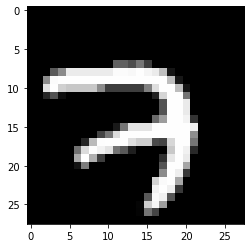

In [7]:
img = np.dstack((x_train[0], x_train[0], x_train[0]))
plt.imshow(img)

In [13]:
batch_size = 512
num_classes = 10
epochs = 5

In [9]:
# convert class vectors to binary class matrices; not needed here as the data is already in one-hot
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# TensorFlow uses the probability to keep nodes, while Keras uses the probability to drop them.
def simple_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def CNN_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
    return model

In [12]:
model = simple_model()

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

W0725 14:30:39.166764 11400 deprecation_wrapper.py:119] From C:\Coding\Anaconda\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 14:30:39.184238 11400 deprecation_wrapper.py:119] From C:\Coding\Anaconda\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0725 14:30:39.373461 11400 deprecation.py:323] From C:\Coding\Anaconda\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 36s 650us/step - loss: 0.5298 - acc: 0.8360 - val_loss: 0.1551 - val_acc: 0.9522
Epoch 2/5
54272/55000 [============================>.] - ETA: 0s - loss: 0.1511 - acc: 0.9550

KeyboardInterrupt: 

In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030447034907341002
Test accuracy: 0.9898
